In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [2]:
data = pd.read_csv("hotel_bookings.csv")
data = data.copy()
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [3]:
# data tipi hakkında bilgiler
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# data'nın boyutu
data.shape

(119390, 32)

In [5]:
# data'nın bazı istatistik bilgileri
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [6]:
# data'nın ne kadar eksik verisi olduğuna bakalım
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
# eksik verilerin data'da yüzde kaç eksik olduğuna bakalım
data.isna().sum() / data.shape[0] * 100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

company kolonunun %94.30 olması bizim bu kolonu doldurabilecek yeterli veri olmadığını böylece ileriki kullanımda bu kolonun kaldırılması daha mantıklı olabilir.

Geri kalan eksik verilerin ne tarzda doldurulacağını model sonuçlarına göre farklı olarak farklı metotlar ile denenebilir.

In [8]:
# Birazda verilerin kendi içindeki değerlerine bakalım
data["hotel"].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [9]:
data["is_canceled"].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [10]:
data["arrival_date_month"].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [11]:
data["deposit_type"].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [12]:
data["customer_type"].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

## Eksik Verilerin Doldurulması

Burada birkaç metod deneyeceğiz bu metodlara göre en iyi sonuç vereni uygulayacağız

1.Deneme

2.Deneme

3.Deneme

Agent veya Company gibi bazı kategorik değişkenlerde kategorilerden biri olarak “NULL” sunulmaktadır. Bu eksik bir değer olarak değil, “uygulanamaz” olarak değerlendirilmelidir. Örneğin, bir rezervasyon "Acente", "NULL" olarak tanımlanırsa, rezervasyonun bir seyahat acentesinden gelmediği anlamına gelir.

In [13]:
data["agent"] = data["agent"].fillna("Not Applicable")
data["company"] = data["company"].fillna("Not Applicable")
data["children"] = data["children"].fillna(0)
data["country"] = data["country"].fillna("Unknown")

knn ile doldurma , random forest ile doldurma, EM ile doldurmada problemler karşımıza çıkmakta 

Aynı anda ebeveyn, çocuk ve bebek = 0 olanları kaldıralım. Çünkü müşteri olmadığı anlamına gelir

In [14]:
data = data.drop(data[(data.adults+data.babies+data.children)==0].index)

# Görselleştirme

<AxesSubplot:title={'center':' Hotel'}, ylabel='hotel'>

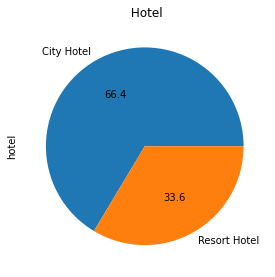

In [15]:
plt.figure(1)
plt.subplot(221)
data['hotel'].value_counts().plot.pie(title=' Hotel',figsize=(20,10),autopct="%1.1f")

Text(0, 0.5, 'İptal Durumu')

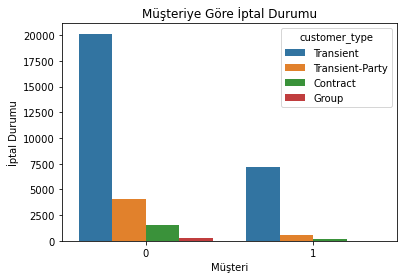

In [16]:
resort_otel = data[data["hotel"] == "Resort Hotel"].value_counts().reset_index()

sns.countplot(data = resort_otel , x = "is_canceled" , hue="customer_type")
plt.title("Müşteriye Göre İptal Durumu")
plt.xlabel("Müşteri")
plt.ylabel("İptal Durumu")

Text(0, 0.5, 'İptal Durumu')

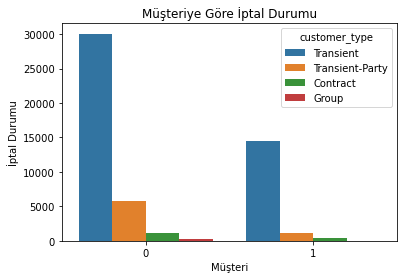

In [17]:
city_otel = data[data["hotel"] == "City Hotel"].value_counts().reset_index()

sns.countplot(data = city_otel , x = "is_canceled" , hue="customer_type")
plt.title("Müşteriye Göre İptal Durumu")
plt.xlabel("Müşteri")
plt.ylabel("İptal Durumu")

Text(0.5, 0, '0: İptal Etmeyen , 1: İptal Eden')

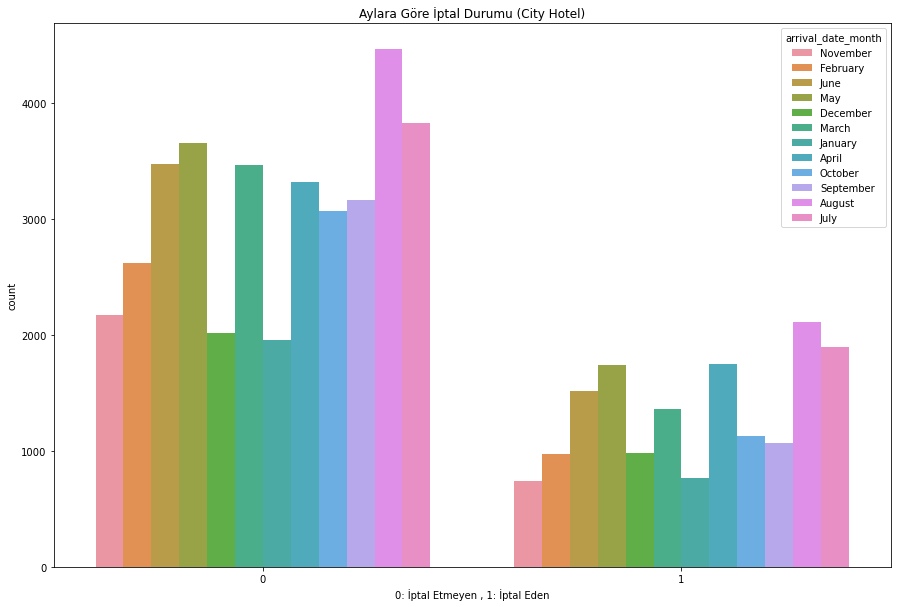

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'is_canceled' , hue = 'arrival_date_month' , data = city_otel)
plt.title('Aylara Göre İptal Durumu (City Hotel)')
plt.xlabel("0: İptal Etmeyen , 1: İptal Eden")

Text(0.5, 0, '0: İptal Etmeyen , 1: İptal Eden')

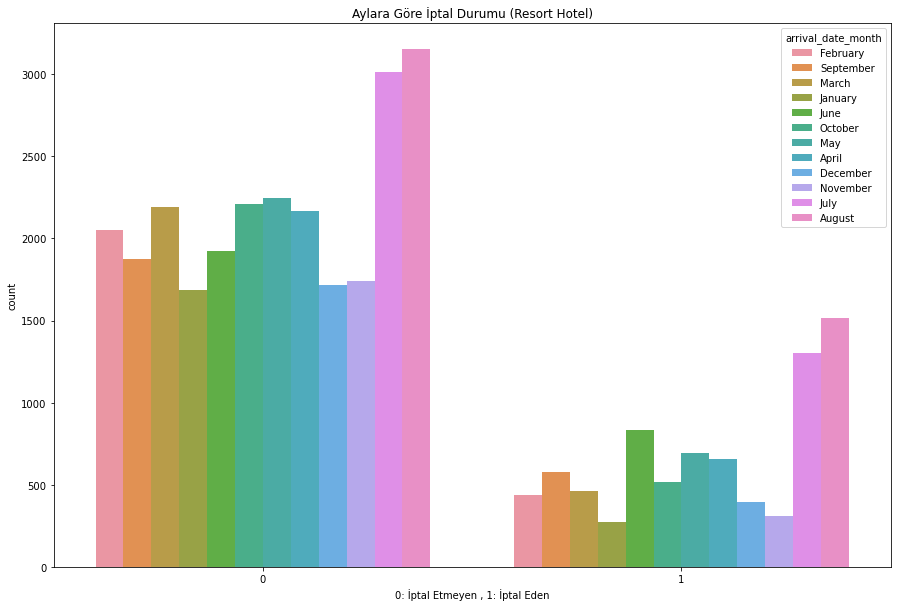

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'is_canceled' , hue = 'arrival_date_month' , data = resort_otel)
plt.title('Aylara Göre İptal Durumu (Resort Hotel)')
plt.xlabel("0: İptal Etmeyen , 1: İptal Eden")

Text(0, 0.5, 'Adet')

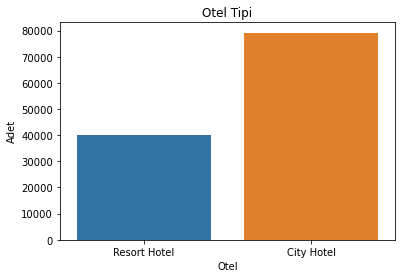

In [20]:
#plt.figure(figsize=(15,10))
sns.countplot(x = "hotel" , data=data)
plt.title("Otel Tipi")
plt.xlabel("Otel")
plt.ylabel("Adet")

Text(0, 0.5, 'Adet')

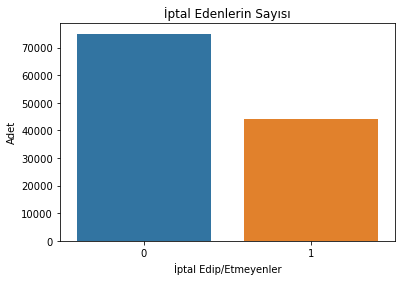

In [21]:
# iptal edenlerin oranı
sns.countplot(x = "is_canceled" , data=data)
plt.title("İptal Edenlerin Sayısı")
plt.xlabel("İptal Edip/Etmeyenler")
plt.ylabel("Adet")

Text(0, 0.5, 'Adet')

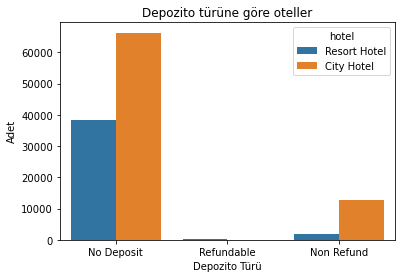

In [22]:
sns.countplot(x = "deposit_type" , hue="hotel" , data=data)
plt.title("Depozito türüne göre oteller")
plt.xlabel("Depozito Türü")
plt.ylabel("Adet")

Text(0, 0.5, 'Adet')

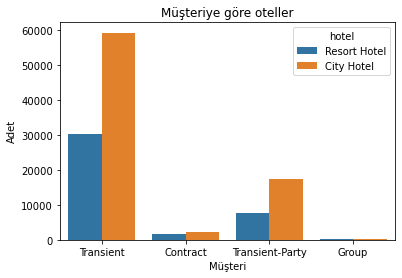

In [23]:
sns.countplot(x = "customer_type" , hue="hotel" , data=data)
plt.title("Müşteriye göre oteller")
plt.xlabel("Müşteri")
plt.ylabel("Adet")

Text(0, 0.5, 'Müşteri')

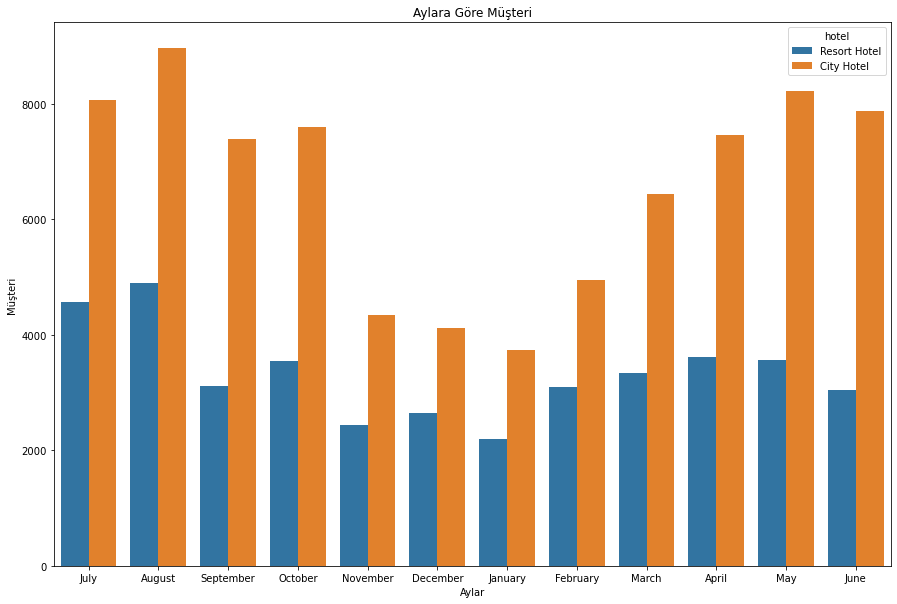

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(x = "arrival_date_month" , hue="hotel" , data=data)
plt.title("Aylara Göre Müşteri")
plt.xlabel("Aylar")
plt.ylabel("Müşteri")

Text(0, 0.5, 'İptal Durumu')

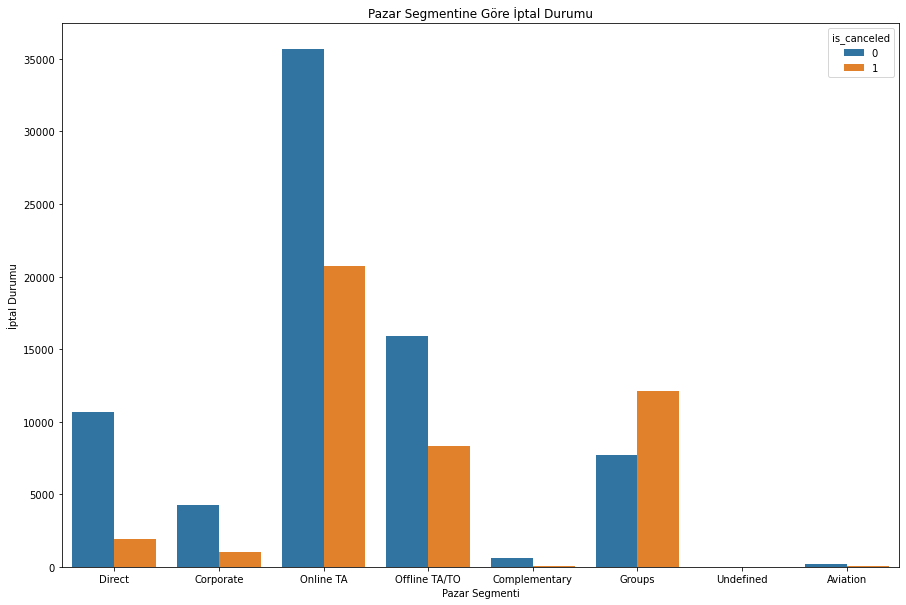

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(x = "market_segment" , hue="is_canceled" , data=data)
plt.title("Pazar Segmentine Göre İptal Durumu")
plt.xlabel("Pazar Segmenti")
plt.ylabel("İptal Durumu")

Text(0, 0.5, 'Depozito Durumu')

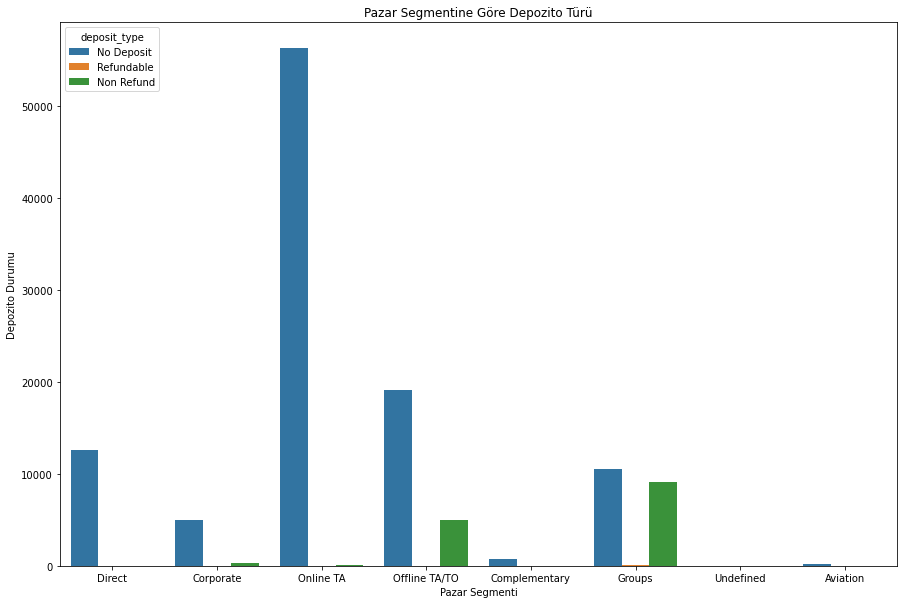

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(x = "market_segment" , hue="deposit_type" , data=data)
plt.title("Pazar Segmentine Göre Depozito Türü")
plt.xlabel("Pazar Segmenti")
plt.ylabel("Depozito Durumu")

Text(0, 0.5, 'ADR')

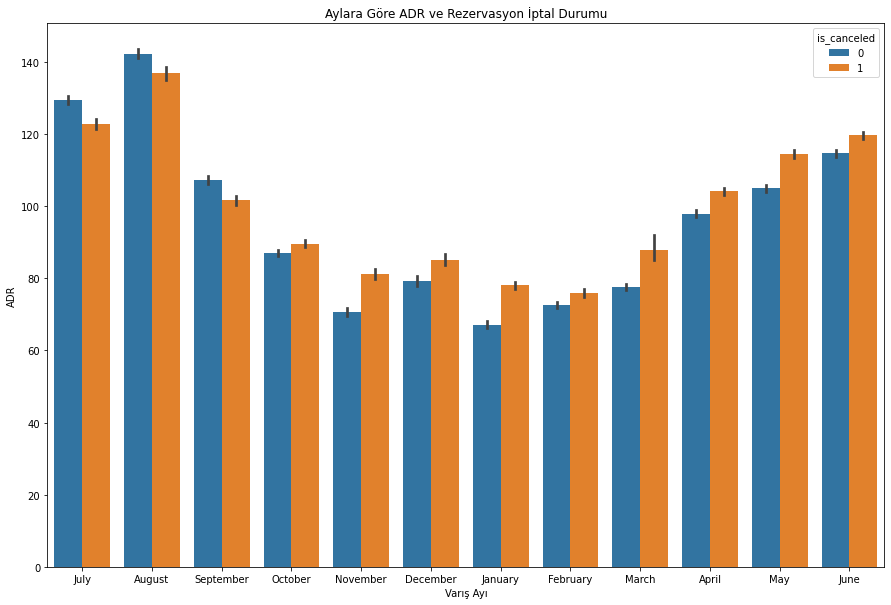

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(x='arrival_date_month' , y='adr' , hue='is_canceled' , data=data)
plt.title("Aylara Göre ADR ve Rezervasyon İptal Durumu")
plt.xlabel('Varış Ayı')
plt.ylabel('ADR')

Text(0, 0.5, 'Adet')

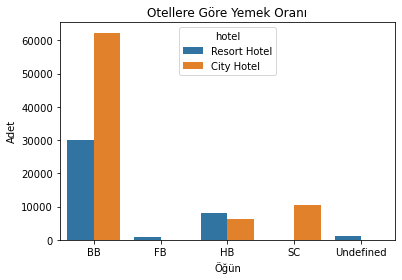

In [28]:
sns.countplot(x='meal' , hue='hotel' ,data=data)
plt.title('Otellere Göre Yemek Oranı')
plt.xlabel('Öğün')
plt.ylabel('Adet')

Text(0, 0.5, 'Adet')

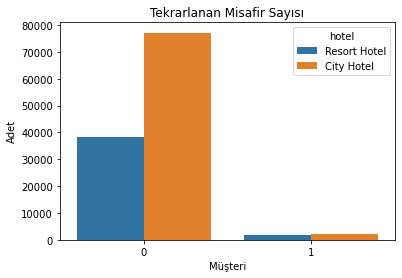

In [29]:
sns.countplot(x='is_repeated_guest' , hue='hotel' , data=data)
plt.title('Tekrarlanan Misafir Sayısı')
plt.xlabel('Müşteri')
plt.ylabel('Adet')

C:\Users\Mehmet_DELIOGLU\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='adr', ylabel='Density'>

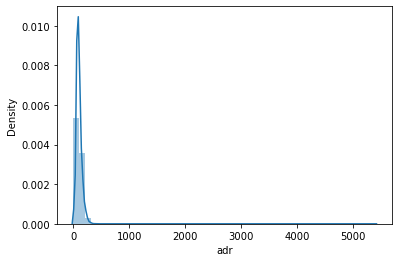

In [30]:
sns.distplot(data["adr"])

In [31]:
data[data["adr"]==data["adr"].describe()["max"]]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,Non Refund,12.0,Not Applicable,0,Transient,5400.0,0,0,Canceled,2016-02-19


C:\Users\Mehmet_DELIOGLU\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='adr', ylabel='Density'>

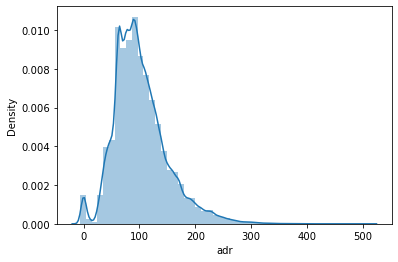

In [32]:
adr_max=data[data["adr"]!=5400]
sns.distplot(adr_max["adr"])

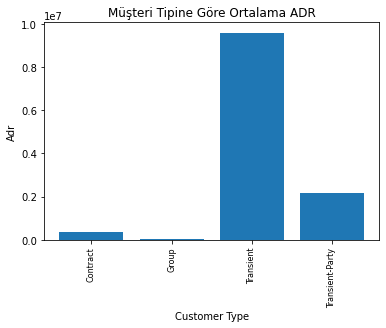

In [33]:
customer_group = data.groupby('customer_type')

adr_sum = customer_group.sum()["adr"]

customer = [cs for cs , data in customer_group]

plt.bar(customer , adr_sum)
plt.title('Müşteri Tipine Göre Ortalama ADR')
plt.ylabel('Adr')
plt.xlabel('Customer Type')
plt.xticks(customer , rotation = 'vertical' , size=8);

C:\Users\MEHMET~1\AppData\Local\Temp/ipykernel_12532/2622511052.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(customer , rotation='vertical' , size=8)


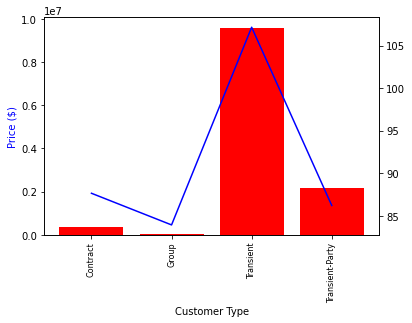

In [34]:
prices = data.groupby('customer_type').mean()["adr"]

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(customer , adr_sum , color='r')
ax2.plot(customer , prices , 'b-')

ax1.set_xlabel('Customer Type')
ax1.set_ylabel('Adr' , color='g')
ax1.set_ylabel('Price ($)' , color='b')
ax1.set_xticklabels(customer , rotation='vertical' , size=8)
plt.show()

In [35]:
countr = data[data["is_canceled"] == 0].groupby("country").count()["hotel"].sort_values(ascending=False)
countr = pd.DataFrame(countr)
countr

,hotel
country,
PRT,20977
GBR,9668
FRA,8468
ESP,6383
DEU,6067
...,...
SMR,1
LCA,1
KIR,1


<AxesSubplot:>

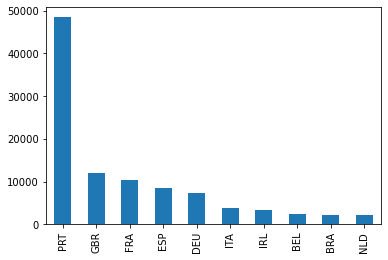

In [36]:
# En çok ziyaretçi olarak gelen ülkeler sıralaması 
country = data.country.value_counts()
country2 = country.head(10)
if len(country) < 10:
    country2['remaining {0} items'.format(len(country) - 10)] = sum(country[10:])
country2.plot(kind='bar')

C:\Users\Mehmet_DELIOGLU\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arrival_date_year', ylabel='Density'>

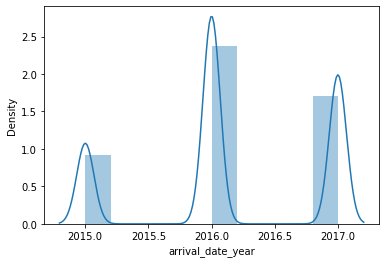

In [37]:
sns.distplot(data["arrival_date_year"], bins=10, kde=True)

C:\Users\Mehmet_DELIOGLU\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arrival_date_day_of_month', ylabel='Density'>

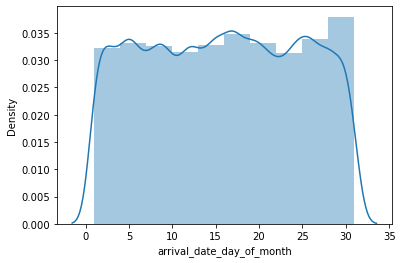

In [38]:
sns.distplot(data["arrival_date_day_of_month"], bins=10, kde=True)